<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/Ex_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
from google.colab import drive #執行這個後點網址可以登入google，登入後會顯示authorization code，再輸入到下面框框
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os #連上雲端硬碟

os.chdir("/content/drive/My Drive/Colab Notebooks/dataset") #可自行在Colab Notebooks後方更改路徑
os.getcwd() #查看當前路徑

'/content/drive/My Drive/Colab Notebooks/dataset'

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[ : , 3 : -1 ].values
y = dataset.iloc[ : ,  -1 ].values

In [ ]:
print(X.shape)
print(X)

(10000, 10)
[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y.shape)
print(y)

(10000,)
[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #二元標籤，因此轉換時使用label encoder
X[ : , 2 ] = le.fit_transform(X[ : , 2 ])

In [ ]:
print(X)
print(X.shape)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]
(10000, 10)


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough') #將第1行轉換成one hot encoder(二元以上)並設定其他欄位挪後
X = np.array(ct.fit_transform(X)) #轉換回array
X = X[:, 1:] #因encoder後互斥，所以可以去除其中一行

In [ ]:
print(X)
print(X.shape)

[[0.0 0.0 619 ... 1 1 101348.88]
 [0.0 1.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [1.0 0.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]]
(10000, 11)


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [ ]:
#####################homwork#######################
import numpy as np
 
print(X[1,:])
hw = np.array([1 , 0 , 600 , 1 , 40 , 3 , 60000 , 2 , 1 , 1 , 50000])
print(hw)

[0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
[    1     0   600     1    40     3 60000     2     1     1 50000]


In [ ]:
#####################homwork#######################
X_test = pd.DataFrame(X_test)
hw = pd.DataFrame(hw)
print(X_test)
print(hw.T)

     0  1    2  3   4  5        6  7  8  9        10
0     1  0  597  0  35  8   131101  1  1  1   192853
1     0  0  523  0  40  2   102967  1  1  0   128702
2     0  1  706  0  42  8  95386.8  1  1  1  75732.2
3     0  0  788  1  32  4   112080  1  0  0  89368.6
4     1  0  706  1  38  5   163035  2  1  1   135662
...  .. ..  ... ..  .. ..      ... .. .. ..      ...
1995  0  0  625  0  24  1        0  2  1  1   180970
1996  0  0  586  0  35  7        0  2  1  0  70760.7
1997  0  1  578  1  36  1   157268  2  1  0   141533
1998  1  0  650  1  34  4   142393  1  1  1  11276.5
1999  1  0  573  1  30  8   127406  1  1  0   192951

[2000 rows x 11 columns]
   0   1    2   3   4   5      6   7   8   9      10
0   1   0  600   1  40   3  60000   2   1   1  50000


In [ ]:
#####################homwork#######################
X_test=X_test.append(hw.T,ignore_index=True)
print(X_test)

     0  1    2  3   4  5        6  7  8  9        10
0     1  0  597  0  35  8   131101  1  1  1   192853
1     0  0  523  0  40  2   102967  1  1  0   128702
2     0  1  706  0  42  8  95386.8  1  1  1  75732.2
3     0  0  788  1  32  4   112080  1  0  0  89368.6
4     1  0  706  1  38  5   163035  2  1  1   135662
...  .. ..  ... ..  .. ..      ... .. .. ..      ...
1996  0  0  586  0  35  7        0  2  1  0  70760.7
1997  0  1  578  1  36  1   157268  2  1  0   141533
1998  1  0  650  1  34  4   142393  1  1  1  11276.5
1999  1  0  573  1  30  8   127406  1  1  0   192951
2000  1  0  600  1  40  3    60000  2  1  1    50000

[2001 rows x 11 columns]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()        #資料標準化
X_train = sc.fit_transform(X_train) #fit為求平均值、標準差、min、max #transform為用fit到的數值執行標準化
X_test = sc.transform(X_test)
print(X_train.shape)

(8000, 11)


## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential() #建立空的nn架構

### Adding the input layer and the first hidding layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim = 11)) #在空的nn架構上新增一層layer，並設定有6個神經元(units),激活函數為relu，input維度為11

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) #在空的nn架構上再新增一層layer

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #在空的nn架構上再新增一層layer，並設定有1個神經元(units),激活函數為sigmoid

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy']) #反向傳播

### Training the ANN on the Training set

In [ ]:
r = ann.fit(X_train, y_train, batch_size = 32, epochs = 100) #8000/32=250 =>8000分割成250個大小32的batch，每次都將整個dataset訓練完重複100次(epoch)

Epoch 1/100
250/250 [==============================] - 0s 965us/step - loss: 0.5554 - accuracy: 0.7725
Epoch 2/100
250/250 [==============================] - 0s 914us/step - loss: 0.4785 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 936us/step - loss: 0.4482 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 927us/step - loss: 0.4328 - accuracy: 0.7961
Epoch 5/100
250/250 [==============================] - 0s 950us/step - loss: 0.4261 - accuracy: 0.7987
Epoch 6/100
250/250 [==============================] - 0s 896us/step - loss: 0.4232 - accuracy: 0.8086
Epoch 7/100
250/250 [==============================] - 0s 885us/step - loss: 0.4205 - accuracy: 0.8160
Epoch 8/100
250/250 [==============================] - 0s 931us/step - loss: 0.4180 - accuracy: 0.8185
Epoch 9/100
250/250 [==============================] - 0s 914us/step - loss: 0.4158 - accuracy: 0.8199
Epoch 10/100
250/250 [==============================] - 0s 919us/step - l

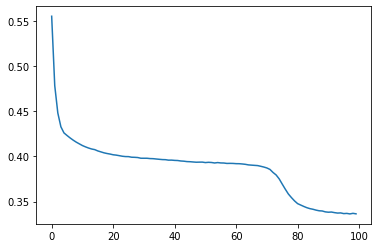

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')

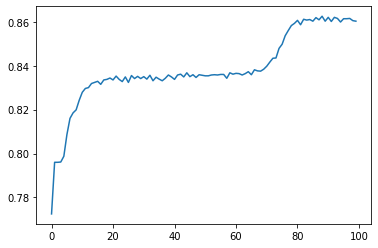

In [ ]:
plt.plot(r.history['accuracy'],label = 'accuracy')

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a simgle observation

**Homework**
Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [ ]:
#####################homwork#######################
y_pred1 = ann.predict(X_test) #預測test
print((y_pred1[2000] > 0.5))


print(X_test.shape)
X_test = X_test[0:2000,:]
print(X_test.shape)

#####sol#######print(ann.predict(sc.transform([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[False]
(2001, 11)
(2000, 11)


### Predicting the Test set results

In [ ]:
y_pred1 = ann.predict(X_test) #預測test
y_pred2 = (y_pred1 > 0.5) #將預測結果轉換成binomial
print(np.concatenate((y_pred1.reshape(len(y_pred1), 1), y_test.reshape(len(y_test), 1)), 1)) 
print(np.concatenate((y_pred2.reshape(len(y_pred2), 1), y_test.reshape(len(y_test), 1)), 1))

[[0.27470252 0.        ]
 [0.37128198 1.        ]
 [0.17190391 0.        ]
 ...
 [0.17260167 0.        ]
 [0.24374098 0.        ]
 [0.1639995  0.        ]]
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
print(y_pred1)
print(y_pred2)

[[0.27470252]
 [0.37128198]
 [0.17190391]
 ...
 [0.17260167]
 [0.24374098]
 [0.1639995 ]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2) #製作混淆矩陣()
print(cm) 
accuracy_score(y_test, y_pred2) 

[[1507   88]
 [ 194  211]]


0.859

### Evaluating the ANN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(): #######設定使用function可直接建立ANN架構
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
ann_cv = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = ann_cv, X = X_train, y = y_train, cv = 10, n_jobs = -1) #交叉驗證，cv預設5，"n_jobs = -1"要打才可以使用全部資源
mean = accuracies.mean()
variance = accuracies.std()
print(accuracies)
print('Mean = ', mean, '; Variance = ', variance)

KeyboardInterrupt: ignored

### Tuning the ANN

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optim): #######同上方，設定使用function可直接建立ANN架構，多了可input optimizer參數
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
ann_gs = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32], 'epochs': [100, 500], 'optim': ['adam', 'rmsprop']} #總共有2by3個組成的grid
grid_search = GridSearchCV(estimator = ann_gs, param_grid = parameters, scoring = 'accuracy', cv = 10) #進行grid search將參數的排列組合都執行
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_ #取出最佳參數
best_accuracy = grid_search.best_score_ #取出最佳accuracy

Epoch 1/100
288/288 [==============================] - 0s 915us/step - loss: 0.5534 - accuracy: 0.7968
Epoch 2/100
288/288 [==============================] - 0s 939us/step - loss: 0.4345 - accuracy: 0.7971
Epoch 3/100
288/288 [==============================] - 0s 966us/step - loss: 0.4276 - accuracy: 0.7971
Epoch 4/100
288/288 [==============================] - 0s 923us/step - loss: 0.4234 - accuracy: 0.7971
Epoch 5/100
288/288 [==============================] - 0s 916us/step - loss: 0.4202 - accuracy: 0.7971
Epoch 6/100
288/288 [==============================] - 0s 947us/step - loss: 0.4180 - accuracy: 0.8153
Epoch 7/100
288/288 [==============================] - 0s 918us/step - loss: 0.4169 - accuracy: 0.8226
Epoch 8/100
288/288 [==============================] - 0s 941us/step - loss: 0.4155 - accuracy: 0.8282
Epoch 9/100
288/288 [==============================] - 0s 922us/step - loss: 0.4148 - accuracy: 0.8292
Epoch 10/100
288/288 [==============================] - 0s 953us/step - l